In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
test_preds = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/Results/End_Model/RandomForest_Occurence-Baseline_preds.csv')

In [3]:
y_true=test_preds.Y_test
y_pred=test_preds.Y_pred

## Plot confusion matrices - Test Set

### Overall

In [4]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pylab as pldata

In [5]:
cm = confusion_matrix(y_true, y_pred)
display_labels = [0,1]

In [6]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.11      0.20       472
           1       0.33      0.95      0.49       220

    accuracy                           0.38       692
   macro avg       0.58      0.53      0.35       692
weighted avg       0.67      0.38      0.29       692



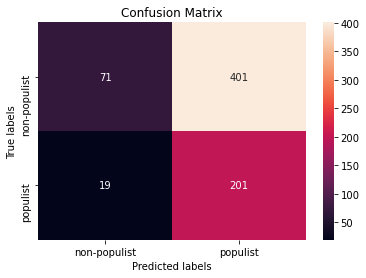

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
plt.savefig('cm_end_model_rf_occ_all.png')

In [20]:
len(test_preds.loc[test_preds['Y_test'] == 0])

472

### Per Text Category

In [17]:
test_preds.Category.unique()

array(['PressRelease', 'Past_PartyMan', 'PartyMan', 'SocialMedia'],
      dtype=object)

In [18]:
test_preds_PRESS = test_preds.loc[test_preds['Category'] == 'PressRelease']
test_preds_PAST_PARTYMAN = test_preds.loc[test_preds['Category'] == 'Past_PartyMan']
test_preds_PARTYMAN =  test_preds.loc[test_preds['Category'] == 'PartyMan']
test_preds_SOCIALMEDIA = test_preds.loc[test_preds['Category'] == 'SocialMedia']

In [21]:
def plot_cm(df, name):
    
    y_true = df.Y_test
    y_pred = df.Y_pred
    
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix '+ name); 
    ax.xaxis.set_ticklabels(['non-populist', 'populist']); ax.yaxis.set_ticklabels(['non-populist', 'populist']);
    plt.savefig('cm_end_model_rf_cat_' + name + '.png')

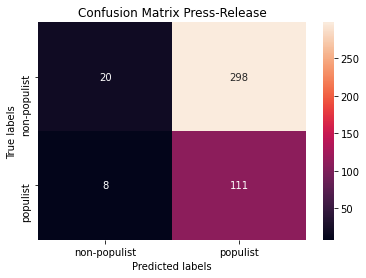

In [22]:
plot_cm(test_preds_PRESS, 'Press-Release')

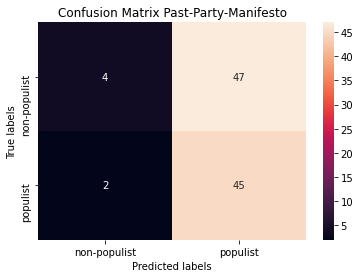

In [23]:
plot_cm(test_preds_PAST_PARTYMAN, 'Past-Party-Manifesto')

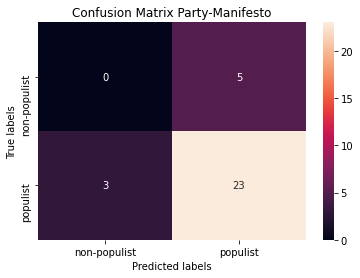

In [24]:
plot_cm(test_preds_PARTYMAN, 'Party-Manifesto')

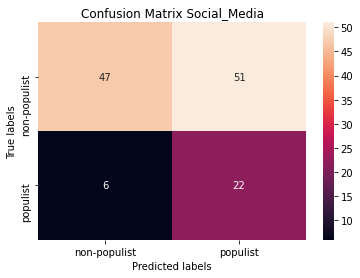

In [25]:
plot_cm(test_preds_SOCIALMEDIA, 'Social_Media')